<a href="https://colab.research.google.com/github/aframuneer26/Deep_Learning_Experiments/blob/main/DL_exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Loss: 0.0690
Epoch 2, Loss: 0.1087
Epoch 3, Loss: 0.1387
Epoch 4, Loss: 0.1613
Epoch 5, Loss: 0.1781
Epoch 6, Loss: 0.1907
Epoch 7, Loss: 0.2001
Epoch 8, Loss: 0.2072
Epoch 9, Loss: 0.2126
Epoch 10, Loss: 0.2166


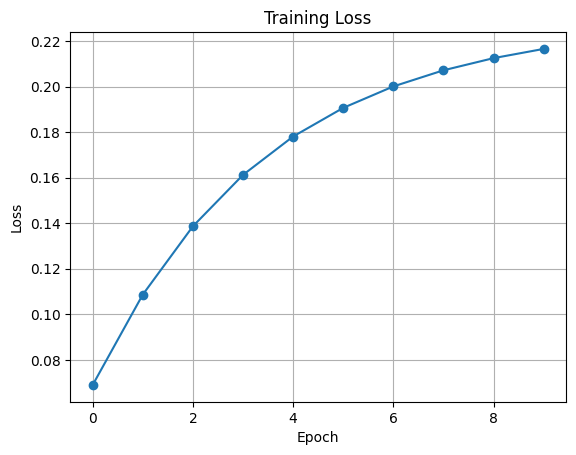

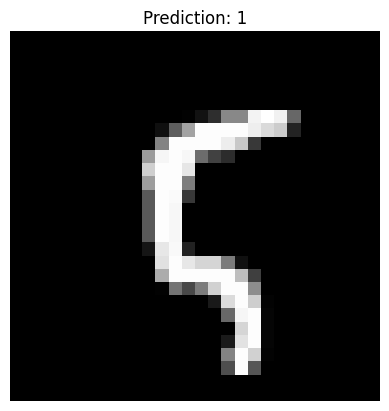

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

# Step 2: Load and Preprocess the Dataset
(X_train, y_train), (_, _) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0   # Normalize pixel values

# Encode labels (works with all sklearn versions)
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

# Step 3: Initialize the Network
input_size, hidden_size, output_size = 784, 64, 10
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Step 4: Define Activation and Loss Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def loss_fn(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-8))

# Step 5: Train the Model (Batch Training for Speed)
epochs, lr = 10, 0.1
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = X_train @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    # Compute loss
    loss = loss_fn(y_train, a2)
    losses.append(loss)

    # Backpropagation
    dz2 = a2 - y_train
    dW2 = a1.T @ dz2 / X_train.shape[0]
    db2 = np.mean(dz2, axis=0, keepdims=True)

    dz1 = (dz2 @ W2.T) * sigmoid_deriv(a1)
    dW1 = X_train.T @ dz1 / X_train.shape[0]
    db1 = np.mean(dz1, axis=0, keepdims=True)

    # Update weights
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

# Step 6: Visualize Training Loss
plt.plot(losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Step 7: Predict a Sample Digit
def predict(img):
    img = img.reshape(1, 784) / 255.0
    a1 = sigmoid(img @ W1 + b1)
    a2 = sigmoid(a1 @ W2 + b2)
    return np.argmax(a2)

# Test with a sample image
idx = 100
plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {predict(X_train[idx])}")
plt.axis('off')
plt.show()
